In [21]:
%matplotlib inline
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier

In [22]:
data_df= pd.read_csv("Hr Analytics_320 datapoints.csv")

In [23]:
data_df.describe()

,Candidate Ref,Notice period,Pecent hike expected in CTC,Percent hike offered in CTC,Rex in Yrs,Age,Status
count,3.200000e+02,320.000000,320.000000,320.000000,320.000000,320.000000,320.000000
mean,2.142706e+06,38.812500,40.536906,38.704487,4.762500,29.612500,0.743750
std,1.738089e+04,27.949728,23.776075,30.092177,2.459675,3.846567,0.437245
min,2.113130e+06,0.000000,-4.260000,-41.890000,0.000000,23.000000,0.000000
25%,2.125858e+06,30.000000,25.665000,22.870000,3.000000,27.000000,0.000000
50%,2.147300e+06,30.000000,37.500000,37.250000,4.000000,29.000000,1.000000
75%,2.157353e+06,60.000000,50.000000,48.307500,6.000000,32.000000,1.000000
max,2.169631e+06,120.000000,177.780000,177.780000,13.000000,45.000000,1.000000


In [24]:
X_features=list(data_df.columns)
X_features.remove('Status')
X_features

['Candidate Ref',
 'DOJ Extended',
 'Notice period',
 'Pecent hike expected in CTC',
 'Percent hike offered in CTC',
 'Joining Bonus',
 'Gender',
 'Candidate Source',
 'Rex in Yrs',
 'Location',
 'Candidate relocate actual',
 'Age']

In [25]:
encoded_data_df=pd.get_dummies(data_df[X_features],
                                 drop_first= True)

In [26]:
list(encoded_data_df.columns)

['Candidate Ref',
 'Notice period',
 'Pecent hike expected in CTC',
 'Percent hike offered in CTC',
 'Rex in Yrs',
 'Age',
 'DOJ Extended_Yes',
 'Joining Bonus_Yes',
 'Gender_Male',
 'Candidate Source_Direct',
 'Candidate Source_Employee Referral',
 'Location_Bangalore',
 'Location_Chennai',
 'Location_Gurgaon',
 'Location_Hyderabad',
 'Location_Mumbai',
 'Location_Noida',
 'Location_Others',
 'Location_Pune',
 'Candidate relocate actual_Yes']

In [27]:
import statsmodels.api as sm

Y=data_df.Status
X=sm.add_constant(encoded_data_df)
from sklearn.model_selection import train_test_split

train_set, test_set, train_labels, test_labels = train_test_split(X, Y, test_size=0.30, random_state=100)

C:\Users\91812\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [28]:
X.head(10)

,const,Candidate Ref,Notice period,Pecent hike expected in CTC,Percent hike offered in CTC,Rex in Yrs,Age,DOJ Extended_Yes,Joining Bonus_Yes,Gender_Male,...,Candidate Source_Employee Referral,Location_Bangalore,Location_Chennai,Location_Gurgaon,Location_Hyderabad,Location_Mumbai,Location_Noida,Location_Others,Location_Pune,Candidate relocate actual_Yes
0,1.0,2113130,30,20.000000,25.000000,7,35,0,0,0,...,1,0,1,0,0,0,0,0,0,0
1,1.0,2113310,0,30.830000,30.830000,9,31,0,0,1,...,0,0,0,0,0,0,1,0,0,1
2,1.0,2113315,0,29.230000,29.230000,11,34,0,0,1,...,0,0,0,0,0,0,1,0,0,1
3,1.0,2113885,0,40.000000,50.000000,5,32,0,0,1,...,0,0,0,0,0,0,1,0,0,1
4,1.0,2114014,0,30.000000,34.000000,10,35,0,0,1,...,0,0,1,0,0,0,0,0,0,0
5,1.0,2114740,0,30.000000,40.850000,10,32,0,1,1,...,0,0,1,0,0,0,0,0,0,0
6,1.0,2114758,90,99.000000,77.860000,4,28,1,0,1,...,0,1,0,0,0,0,0,0,0,0
7,1.0,2114820,30,50.000000,104.000000,7,30,1,0,1,...,0,0,0,0,1,0,0,0,0,0
8,1.0,2114973,60,125.000000,105.000000,2,26,0,0,1,...,1,0,0,0,0,0,1,0,0,0
9,1.0,2115094,0,40.536906,38.292298,2,24,0,0,1,...,0,0,0,0,0,0,0,0,0,1


In [29]:
Y

0      0
1      1
2      1
3      1
4      0
      ..
315    1
316    1
317    1
318    0
319    1
Name: Status, Length: 320, dtype: int64

In [47]:
test_set

,const,Candidate Ref,Notice period,Pecent hike expected in CTC,Percent hike offered in CTC,Rex in Yrs,Age,DOJ Extended_Yes,Joining Bonus_Yes,Gender_Male,...,Candidate Source_Employee Referral,Location_Bangalore,Location_Chennai,Location_Gurgaon,Location_Hyderabad,Location_Mumbai,Location_Noida,Location_Others,Location_Pune,Candidate relocate actual_Yes
268,1.0,2161845,0,47.530000,47.53,2,31,0,0,1,...,0,0,0,0,0,0,1,0,0,1
149,1.0,2144505,60,40.536906,42.86,5,30,1,0,1,...,1,1,0,0,0,0,0,0,0,0
124,1.0,2136278,60,85.190000,51.52,4,25,0,0,1,...,1,0,0,0,1,0,0,0,0,0
1,1.0,2113310,0,30.830000,30.83,9,31,0,0,1,...,0,0,0,0,0,0,1,0,0,1
259,1.0,2160481,75,54.760000,42.86,3,31,1,0,1,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174,1.0,2149085,30,50.000000,68.00,2,28,1,0,1,...,0,0,0,0,0,0,1,0,0,0
32,1.0,2118140,30,40.000000,22.00,5,36,0,0,1,...,1,0,0,0,0,0,1,0,0,0
160,1.0,2147302,45,44.000000,50.80,2,24,0,0,1,...,1,0,0,0,0,0,1,0,0,0
123,1.0,2135701,60,38.970000,38.97,2,27,1,0,1,...,1,0,0,0,0,0,1,0,0,0


In [30]:
dt_model = DecisionTreeClassifier(criterion = 'entropy' )

In [31]:
dt_model.fit(train_set, train_labels)

DecisionTreeClassifier(criterion='entropy')

In [32]:
dt_model.score(test_set , test_labels)

0.7083333333333334

In [33]:
dt_model.predict(test_set)

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 1, 1, 1, 0], dtype=int64)

In [41]:
from IPython.display import Image  
#import pydotplus as pydot
from sklearn import tree
from os import system

train_char_label = ['1', '2', '3']
HR_tree_File = open('HR_tree.dot','w')
dot_data = tree.export_graphviz(dt_model, out_file=HR_tree_File, feature_names = list(train_set), class_names = list(train_char_label))

HR_tree_File.close()

# importance of features in the tree building ( The importance of a feature is computed as the 
#(normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print (pd.DataFrame(dt_model.feature_importances_, columns = ["Imp"], index = train_set.columns))

                                         Imp
const                               0.000000
Candidate Ref                       0.139195
Notice period                       0.083142
Pecent hike expected in CTC         0.180113
Percent hike offered in CTC         0.161749
Rex in Yrs                          0.127981
Age                                 0.061159
DOJ Extended_Yes                    0.021683
Joining Bonus_Yes                   0.012813
Gender_Male                         0.012108
Candidate Source_Direct             0.016474
Candidate Source_Employee Referral  0.000000
Location_Bangalore                  0.000000
Location_Chennai                    0.000000
Location_Gurgaon                    0.000000
Location_Hyderabad                  0.000000
Location_Mumbai                     0.000000
Location_Noida                      0.030606
Location_Others                     0.000000
Location_Pune                       0.000000
Candidate relocate actual_Yes       0.152977


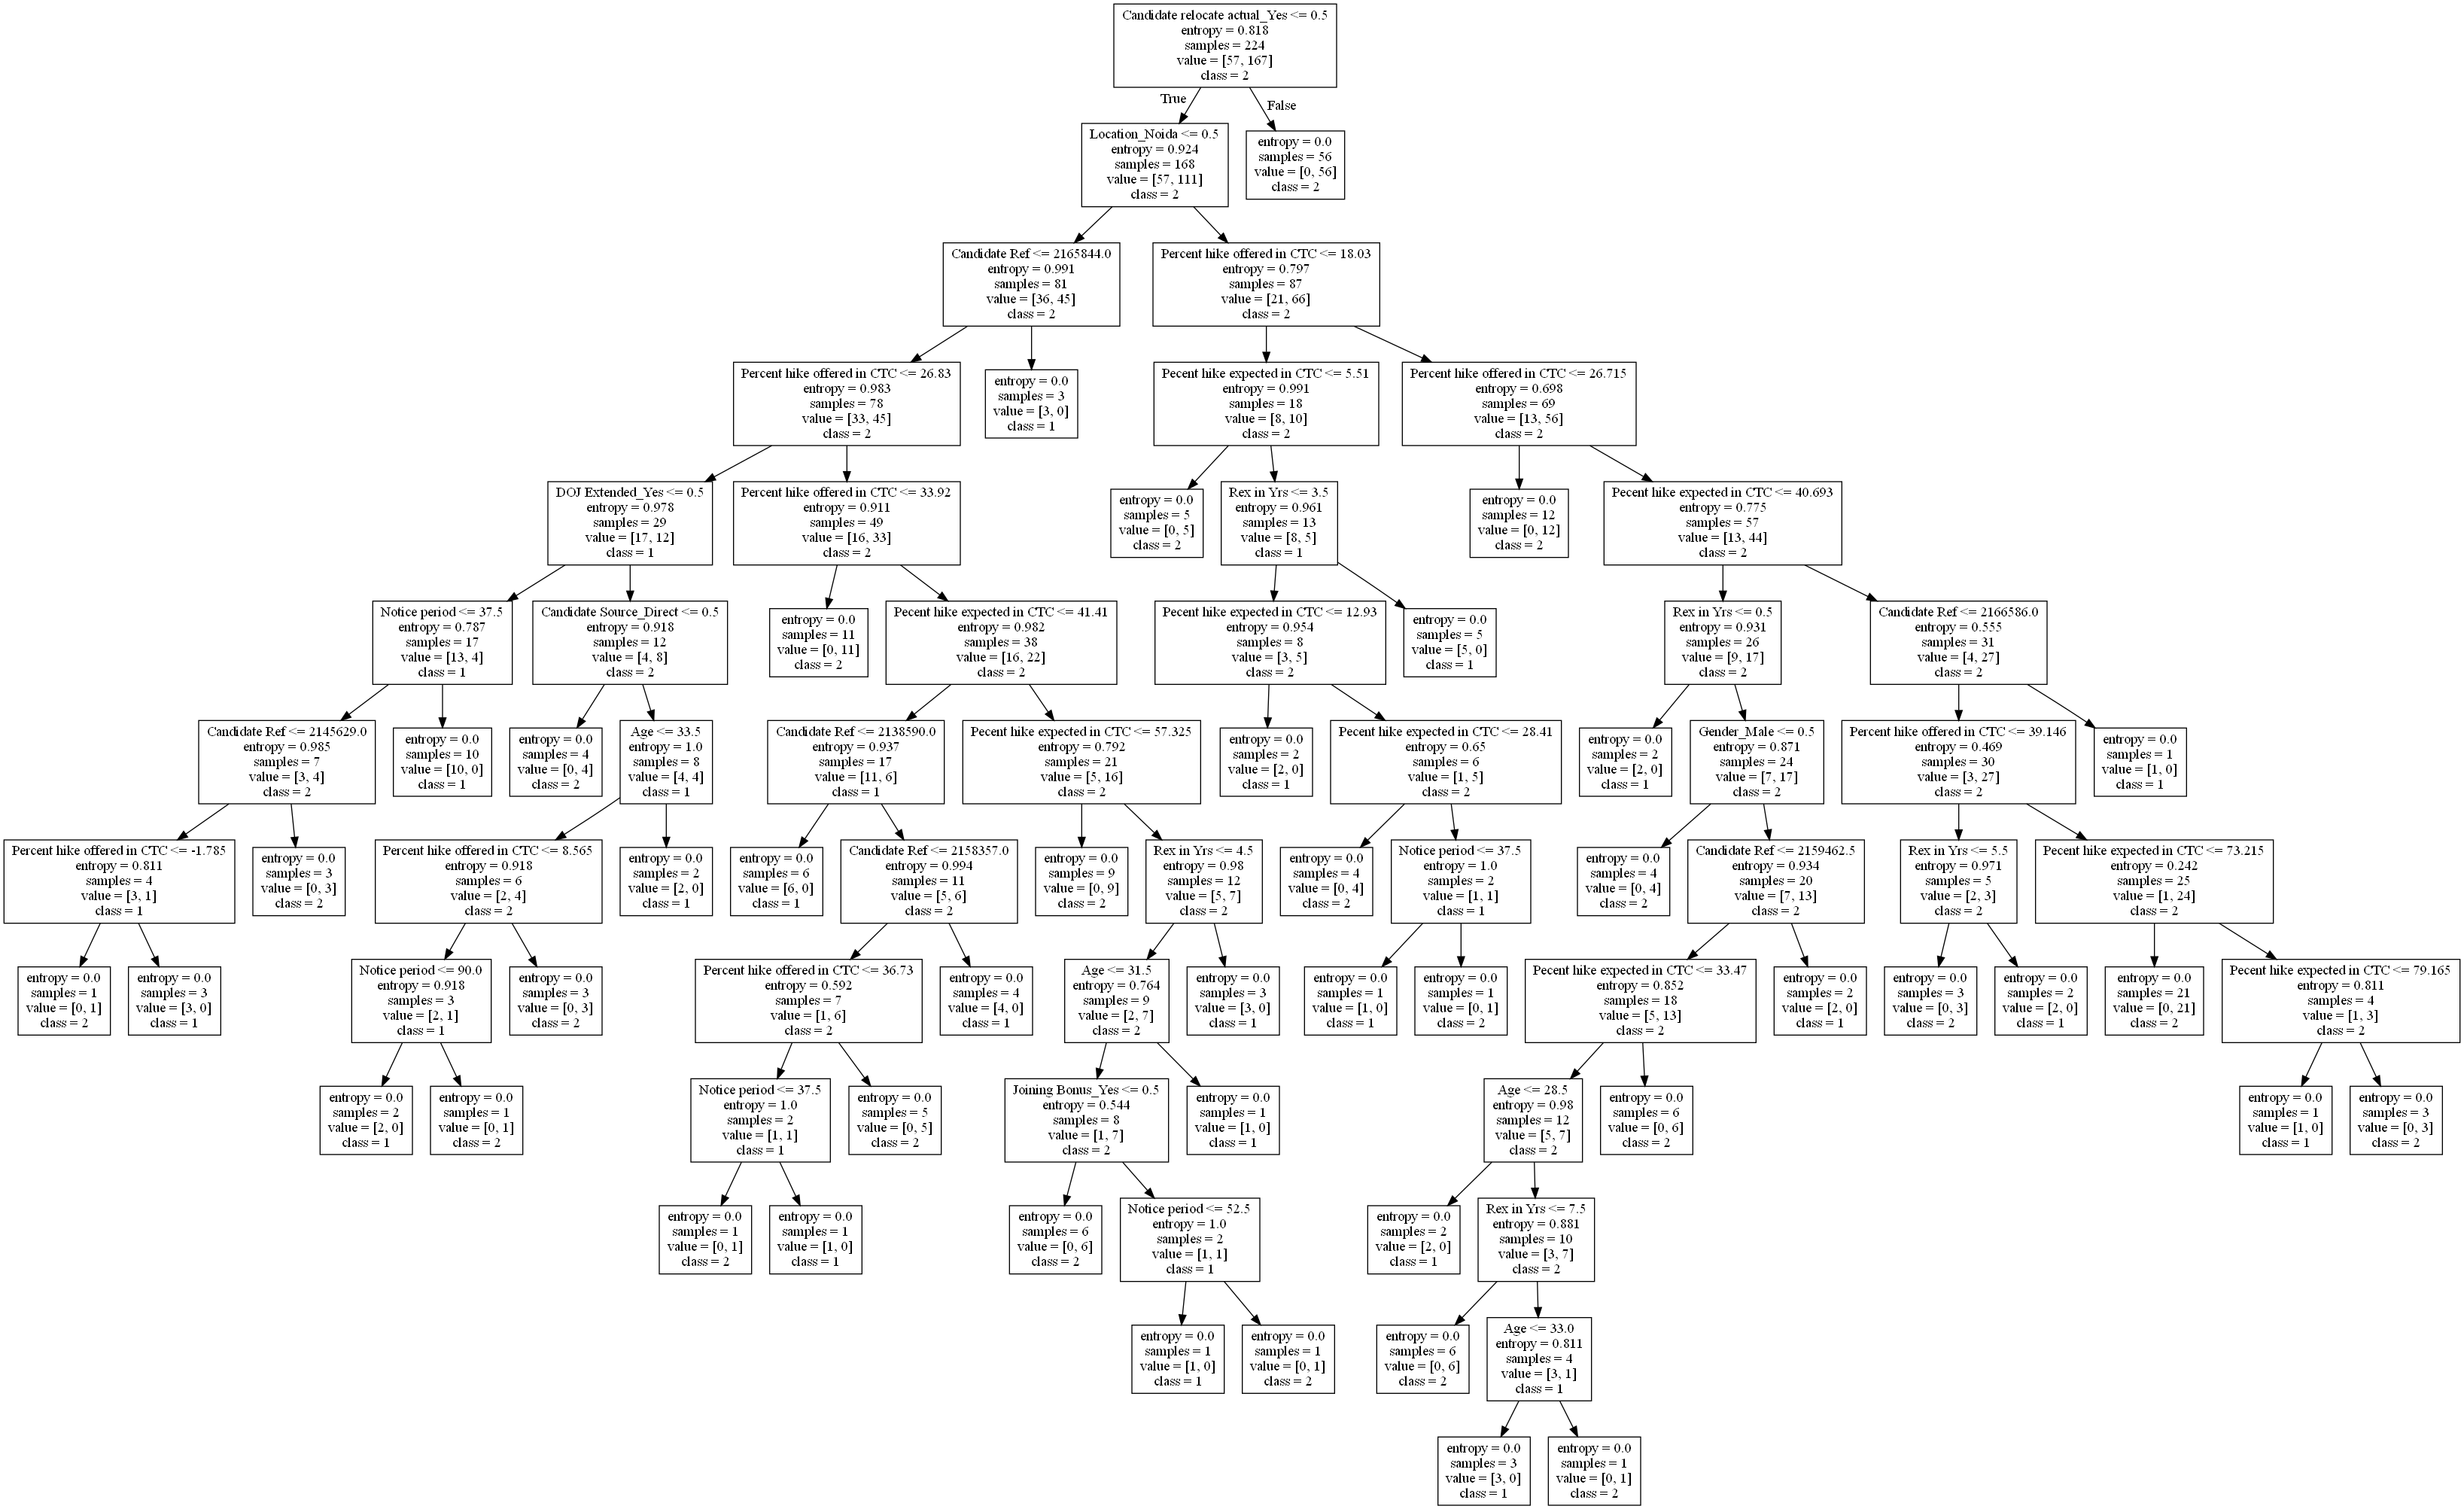

In [42]:
# You can also copy the script in the .dot file and paste it at http://webgraphviz.com/ to get tree view 
#or create a .png as below

system('dot -Tpng HR_tree.dot -o HR_tree.png')   # This command is to the OS
Image('HR_tree.png')        # use the image command to read the .png file and print on screen

In [43]:
dt_model = DecisionTreeClassifier(criterion = 'entropy')
dt_model.fit(train_set, train_labels)
DecisionTreeClassifier(criterion='entropy')
HR_tree_regularized = open('HR_tree_regularized.dot','w')
dot_data = tree.export_graphviz(dt_model, out_file= HR_tree_regularized , feature_names = list(train_set), class_names = list(train_char_label))

HR_tree_regularized.close()

print (pd.DataFrame(dt_model.feature_importances_, columns = ["Imp"], index = train_set.columns))

                                         Imp
const                               0.000000
Candidate Ref                       0.139195
Notice period                       0.068112
Pecent hike expected in CTC         0.204610
Percent hike offered in CTC         0.161749
Rex in Yrs                          0.127981
Age                                 0.040781
DOJ Extended_Yes                    0.021683
Joining Bonus_Yes                   0.012813
Gender_Male                         0.023020
Candidate Source_Direct             0.016474
Candidate Source_Employee Referral  0.000000
Location_Bangalore                  0.000000
Location_Chennai                    0.000000
Location_Gurgaon                    0.000000
Location_Hyderabad                  0.000000
Location_Mumbai                     0.000000
Location_Noida                      0.030606
Location_Others                     0.000000
Location_Pune                       0.000000
Candidate relocate actual_Yes       0.152977


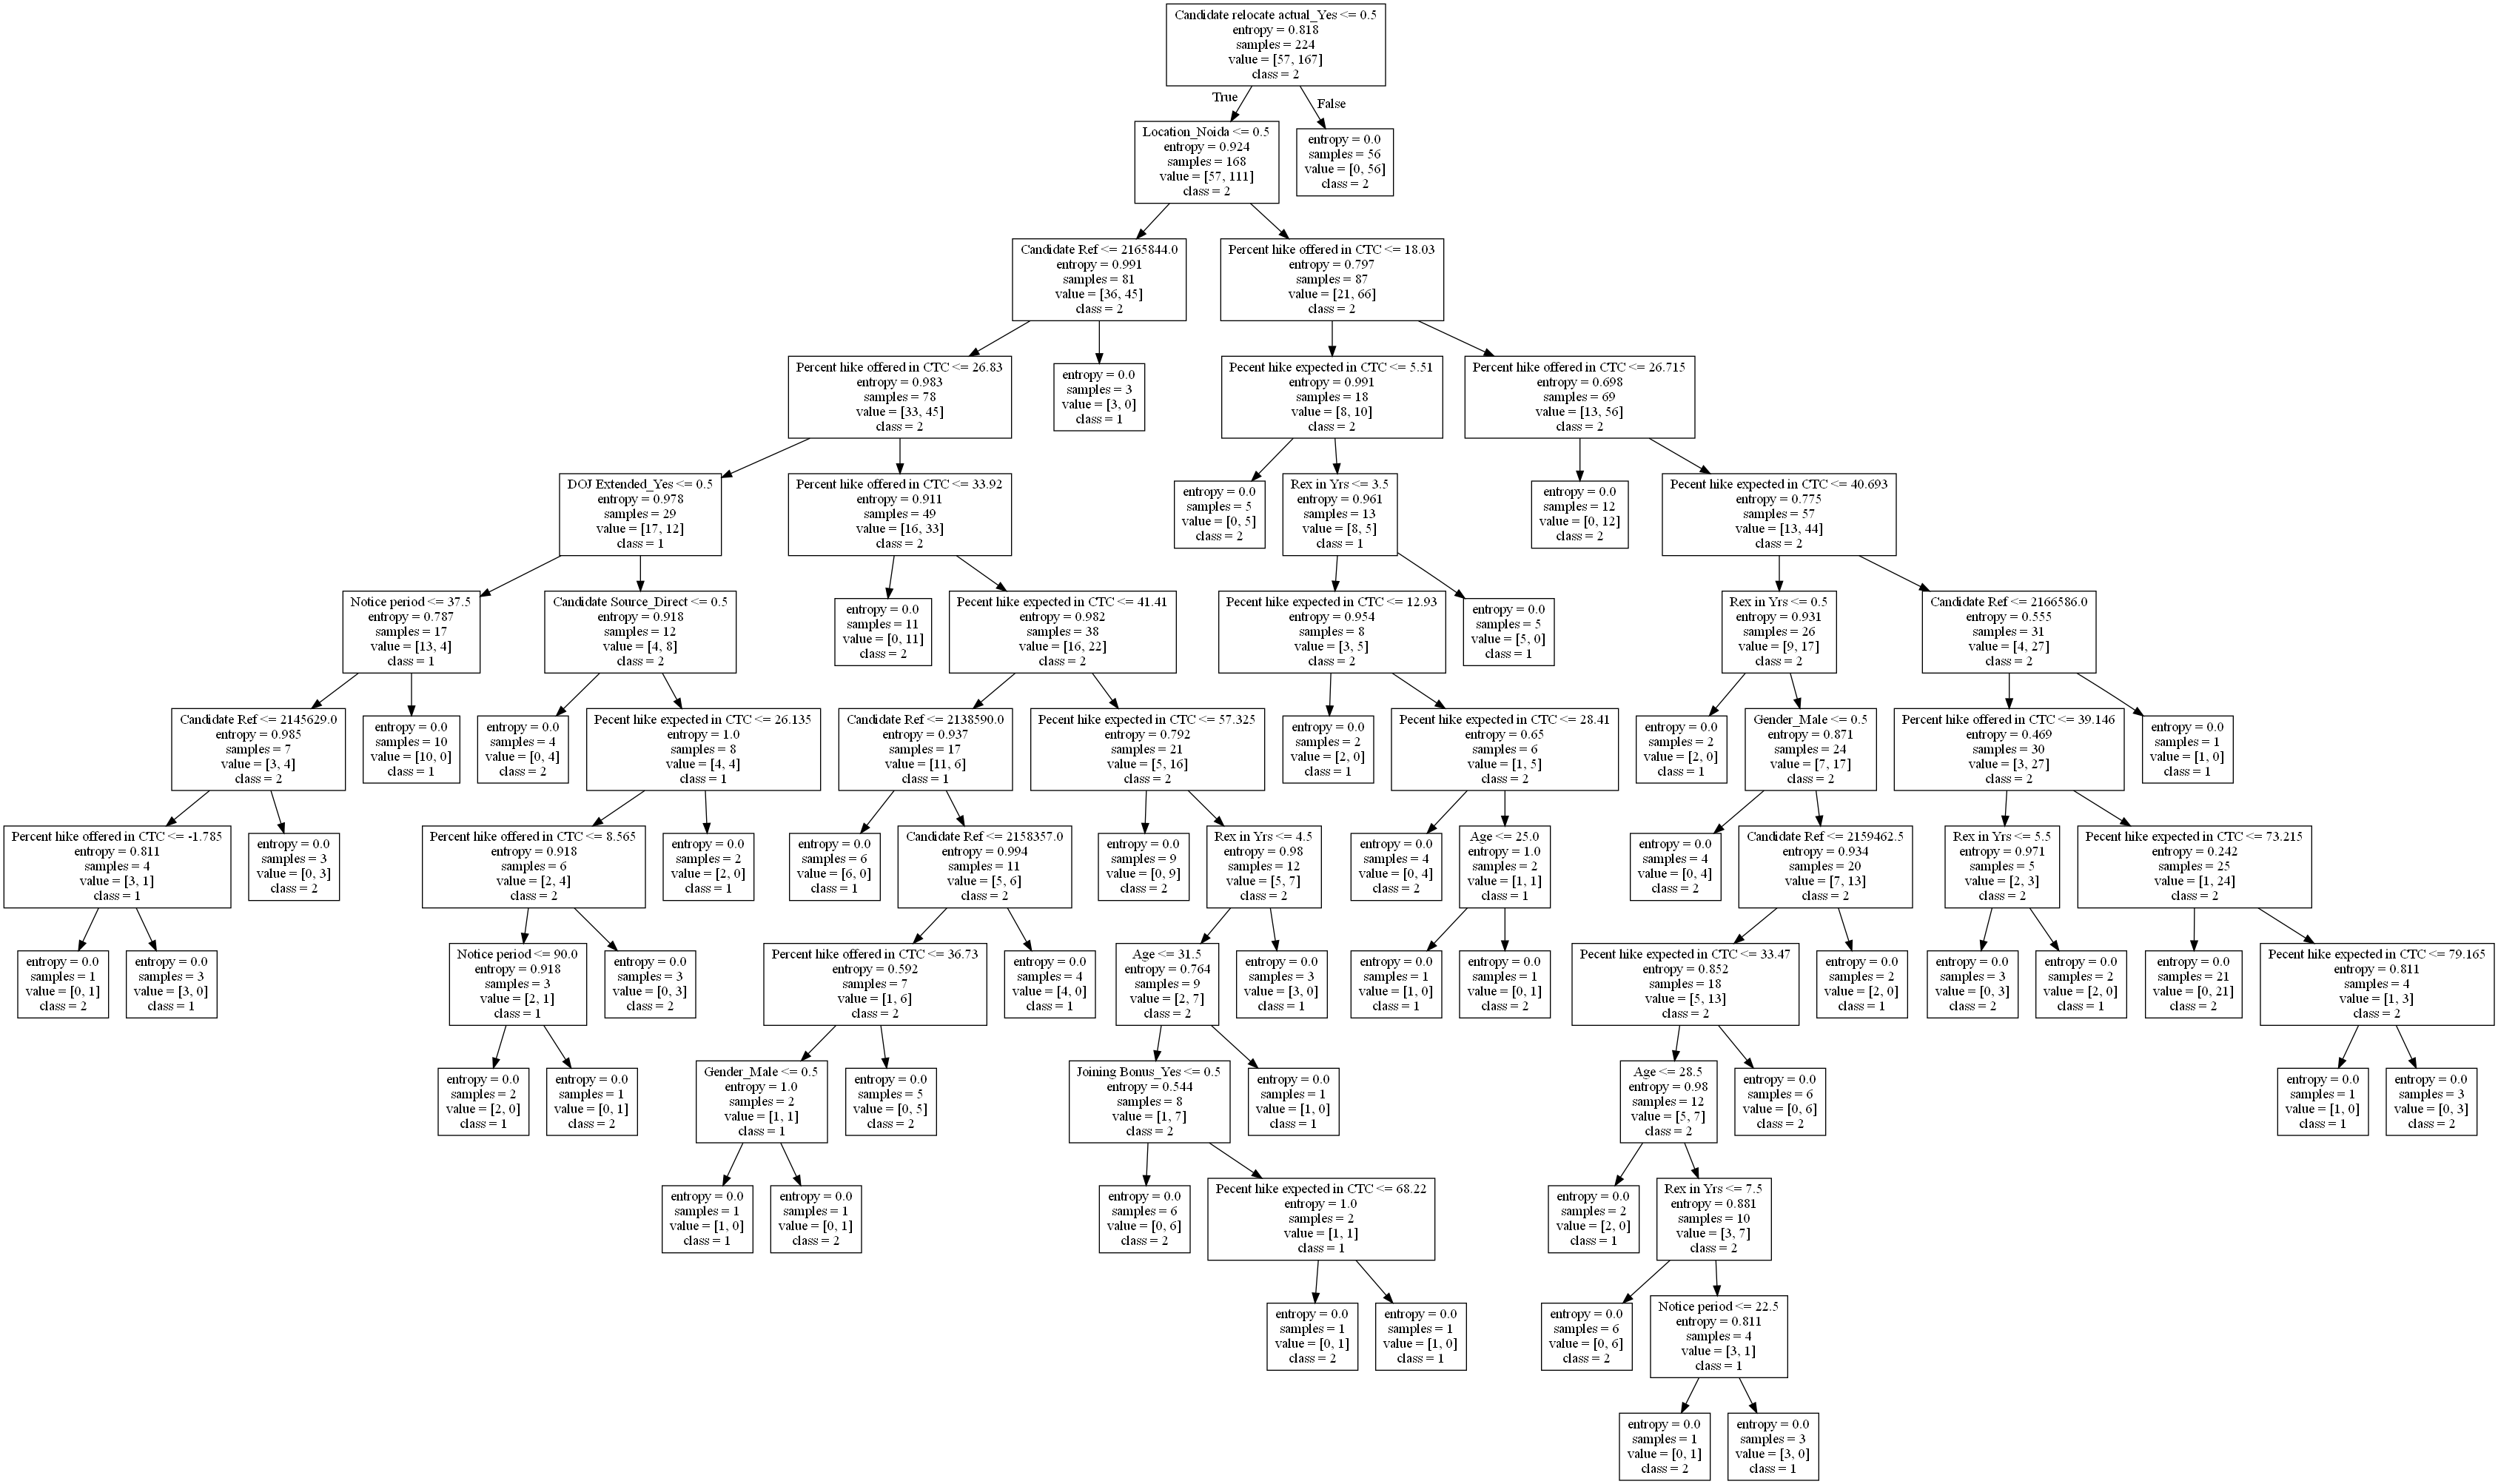

In [44]:
# You can also copy the script in the .dot file and paste it at http://webgraphviz.com/ to get tree view
# or create a .png as below
system('dot -Tpng HR_tree_regularized.dot -o HR_tree_regularized.png')
Image('HR_tree_regularized.png')

In [45]:
test_pred = dt_model.predict(test_set)
dt_model.score(test_set , test_labels)

0.71875

In [46]:
pred_labels = dt_model.predict(test_set)
pred_labels

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 1, 1, 1, 0], dtype=int64)

Text(0.5, 15.0, 'Predicted label')

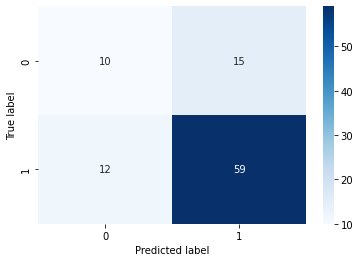

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(test_labels,pred_labels)

sns.heatmap(conf_matrix, annot=True,cmap='Blues')
plt.ylabel('True label')
plt.xlabel('Predicted label')

In [48]:
test_labels

268    1
149    0
124    1
1      1
259    1
      ..
174    1
32     0
160    1
123    0
269    1
Name: Status, Length: 96, dtype: int64

In [54]:
from sklearn.model_selection import GridSearchCV

tuned_parameters = [{'criterion': ['gini','entropy'], 
                     'max_depth': range(2,100)}]


dt_model = DecisionTreeClassifier()

clf = GridSearchCV(dt_model,
                 tuned_parameters,
                 cv=10,
                 scoring='accuracy')

clf.fit(train_set , train_labels )

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid=[{'criterion': ['gini', 'entropy'],
                          'max_depth': range(2, 100)}],
             scoring='accuracy')

In [55]:
clf.best_score_

0.7053359683794467

In [56]:
clf.best_params_

{'criterion': 'gini', 'max_depth': 3}

In [57]:
# import Random Forest classifier

from sklearn.ensemble import RandomForestClassifier



# instantiate the classifier 

rfc = RandomForestClassifier(n_estimators=100,random_state=100)

In [58]:
# fit the model

rfc.fit(train_set , train_labels)

RandomForestClassifier(random_state=100)

In [59]:
# Predict the Test set results

y_pred = rfc.predict(test_set)

In [60]:
rfc.score(test_set , test_labels)

0.7604166666666666

In [61]:
rfc.score(train_set , train_labels)

1.0

In [62]:
test_pred = rfc.predict(test_set)

In [63]:
pred_labels = rfc.predict(test_set)
pred_labels

array([1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

Text(0.5, 15.0, 'Predicted label')

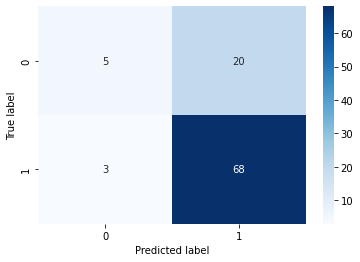

In [64]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(test_labels,pred_labels)

sns.heatmap(conf_matrix, annot=True,cmap='Blues')
plt.ylabel('True label')
plt.xlabel('Predicted label')

In [69]:
from sklearn.model_selection import GridSearchCV

tuned_parameters = [{'criterion': ['gini','entropy'], 
                     'max_depth': range(2,100),
                     'n_estimators': range(100,300)}]


rfc_2 = RandomForestClassifier()

clf = GridSearchCV(rfc_2,
                 tuned_parameters,
                 cv=3,
                 scoring='accuracy')

clf.fit(train_set , train_labels )

KeyboardInterrupt: 

In [67]:
clf.best_score_

AttributeError: 'GridSearchCV' object has no attribute 'best_score_'

In [ ]:
clf.best_params_